In [27]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

# 글꼴 깨짐 방지
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False

# 데이터 프레임 
df = pd.read_csv("/Users/b26/Desktop/미니프로젝트/패스트캠퍼스 데이터분석/실습데이터.csv")

# 카테고리 별 판매 강의 수 분석

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [29]:
df.카테고리.unique()

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

In [30]:
df_category = df.groupby('카테고리')['실거래금액']

In [31]:
df_category.sum()

카테고리
데이터 사이언스    4372903916
디자인         1367770714
마케팅         1686933912
부동산/금융      2194701472
부업/창업        102751487
업무 생산성      1542856913
영상/3D       2032814565
일러스트        2140823180
크리에이티브               0
투자/재테크       447801574
프로그래밍       6708714350
Name: 실거래금액, dtype: int64

In [32]:
df['실거래금액']

0         159000
1         501000
2         549000
3         135000
4         239000
           ...  
159323    207000
159324    385000
159325    136000
159326    289000
159327   -345240
Name: 실거래금액, Length: 159328, dtype: int64

In [33]:
df_category = df.groupby('카테고리')['실거래금액']

In [37]:
df_category = df_category.sum().reset_index()

In [38]:
df_category['실거래금액']  = df_category['실거래금액'] / 100000000

In [45]:
df_category = df_category.sort_values(by='실거래금액' , ascending=False)

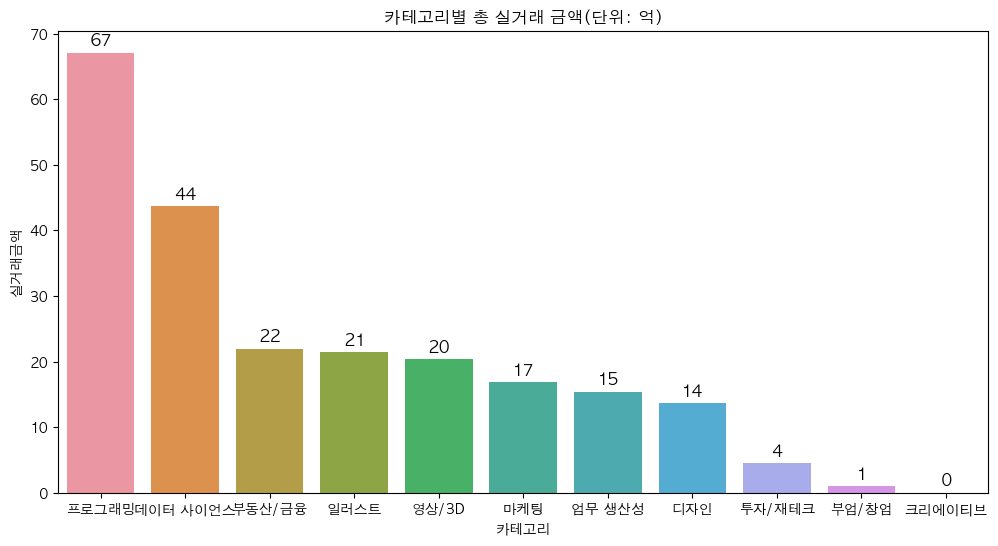

In [56]:
# 시각화
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='카테고리', y='실거래금액', data=df_category)
plt.title('카테고리별 총 실거래 금액(단위: 억)')
# 그래프에 값 표시
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline',
                      size=12, xytext=(0, 5),
                      textcoords='offset points')

plt.show()

# pie 그래프 

In [59]:
# 개발 / 비개발 로 분류하여 점유율 파악하기

In [76]:
# 개발 관련 카테고리 목록
dev_categories = ['데이터 사이언스', '프로그래밍']

# 개발 또는 비개발 분야로 분류하는 함수
def classify_dev_nondev(category):
    if category in dev_categories:
        return '코딩 분야'
    else:
        return '기타 분야'

# 개발/비개발 분류 열 추가
df['분류'] = df['카테고리'].apply(classify_dev_nondev)

# 카테고리별 실거래금액 계산
df_category = df.groupby(['분류', '카테고리'])['실거래금액'].sum().reset_index()

In [77]:
df_new_category = df_category.groupby('분류')['실거래금액'].sum().reset_index()

In [78]:
df_new_category

,분류,실거래금액
0,기타 분야,11516453817
1,코딩 분야,11081618266


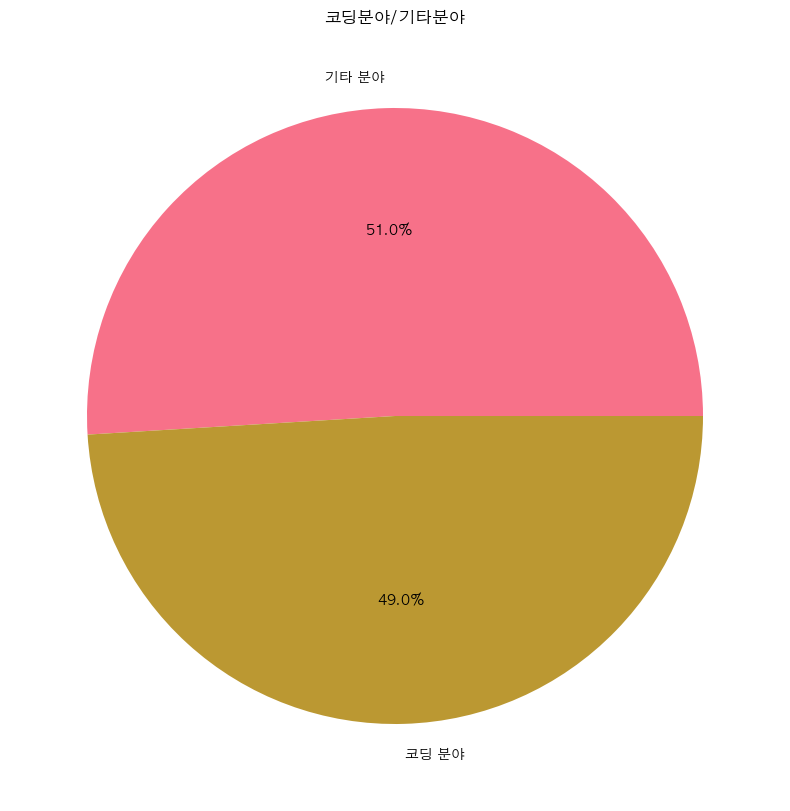

In [79]:
# 원형 차트 시각화
plt.figure(figsize=(10, 10))
sns.set_palette("husl")
plt.pie(df_new_category['실거래금액'], labels=df_new_category['분류'], autopct='%.1f%%',colors=sns.color_palette())
plt.title('코딩분야/기타분야')
plt.show()

#  강의 수 대비 매출 파악해보기

In [80]:
df.sample(20)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,분류
65093,2055927,PAYMENT,74855,211594,FASTCAMPUS,올인원,일러스트,CLASS : 색의 온도를 담아 표현하는 송블리의 색연필 인물화,2022. 8. 12. 오후 2:08:48,[무료수강권] 강의 참고용 발행_강사님,68500,PROMOTION,0,68500,0,-,기타 분야
48646,2138804,PAYMENT,5748,203146,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022. 9. 14. 오전 11:09:26,[20% 할인 쿠폰] The RED : 현실 세상의 TDD : 안정감을 주는 코드 ...,233000,CARD,186400,46600,186400,-,코딩 분야
152160,1576683,PAYMENT,53873,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022. 1. 8. 오후 2:01:59,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,221000,POINT,171000,50000,171000,-,코딩 분야
142436,1630771,PAYMENT,88905,207458,FASTCAMPUS,올인원,프로그래밍,Prometheus와 Grafana를 이용한 실시간 모니터링 시각화,2022. 1. 30. 오후 7:01:55,-,169000,POINT,169000,-,169000,-,코딩 분야
72097,2010436,PAYMENT,16641,211543,FASTCAMPUS,올인원,프로그래밍,합격의 하이패스 : SQLD 자격 과정,2022. 7. 25. 오전 9:07:15,-,59000,POINT,59000,-,59000,-,코딩 분야
86390,1936119,PAYMENT,73057,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 6. 26. 오후 4:06:53,[업무생산성] 3만원할인,177000,TRANS,147000,30000,147000,-,기타 분야
68743,2031117,PAYMENT,63819,212555,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 컴퓨터 비전 정주행 Kit,2022. 8. 1. 오후 2:08:35,패캐머_온라인 쿠폰 !,419000,PROMOTION,0,419000,0,-,코딩 분야
85573,1939503,PAYMENT,8982,211893,FASTCAMPUS,RED,부동산/금융,The RED : 박지웅의 8천억 원 가치의 회사를 만드는 컴퍼니빌딩,2022. 6. 27. 오후 8:06:09,[20% 할인쿠폰] The RED : 박지웅의 8천억 원 가치의 회사를 만드는 컴퍼...,189000,POINT,151200,37800,151200,-,기타 분야
136320,1654023,REFUND,31364,208686,FASTCAMPUS,올인원,투자/재테크,"해외주식명저로 배우는 글로벌 Top 헤지펀드, 퀀트 투자 전략",2022. 2. 8. 오후 1:02:08,-,334000,CARD,-334000,-,-,-334000,기타 분야
33455,2218679,PAYMENT,34905,213315,FASTCAMPUS,올인원,일러스트,네오아카데미 : 킨티의 58개의 예제를 통해 배우는 캐주얼 캐릭터 완전판,2022. 10. 20. 오전 7:10:37,[WELCOME] 온라인 강의 3만원 할인,184000,POINT,154000,30000,154000,-,기타 분야


In [93]:
coding_count = len(df[df['분류'] == '코딩 분야'])
non_coding_count = len(df[df['분류'] == '기타 분야'])

print("코딩 분야 강의 수:", coding_count)
print("비코딩 분야 강의 수:", non_coding_count)


코딩 분야 강의 수: 78564
비코딩 분야 강의 수: 80764


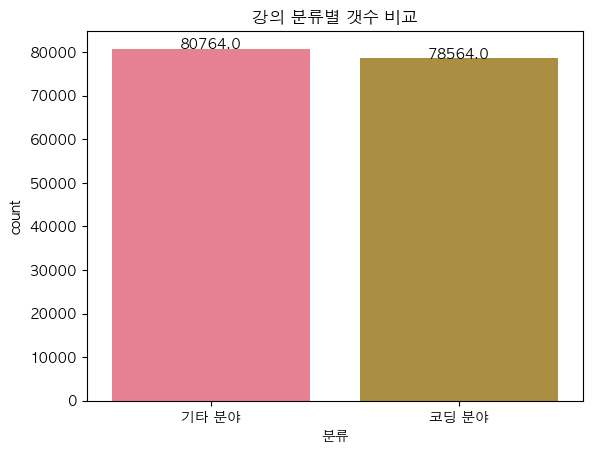

In [106]:
ax = sns.countplot(x='분류', data=df)
plt.title('강의 분류별 갯수 비교')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, height, ha="center")

plt.show()

 ### 전체 카테고리에선 개발 / 코딩 분야가 월등히 많은 판매량을 기록하고 있으나, 기타 분야들에서 나오는 매출도 유의미함

In [107]:
df.sample(50)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,분류
145444,1611437,PAYMENT,8789,204373,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022. 1. 21. 오후 11:01:07,[WELCOME] 처음이라면 누구나 업무생산성 5만원 할인,156000,CARD,106000,50000,106000,-,기타 분야
112135,1781284,PAYMENT,6336,203525,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,2022. 4. 10. 오전 11:04:45,-,233000,POINT,233000,-,233000,-,코딩 분야
72759,2008175,PAYMENT,75849,206720,FASTCAMPUS,올인원,영상/3D,용호수의 돈 버는 실전 영상 제작,2022. 7. 24. 오전 1:07:36,-,299000,CARD,299000,-,299000,-,기타 분야
127630,1700160,REFUND,55628,206419,FASTCAMPUS,올인원,데이터 사이언스,"올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리",2022. 2. 28. 오후 5:02:39,-,252000,CARD,-232000,-,-,-232000,코딩 분야
88285,1923981,PAYMENT,34680,211368,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022. 6. 21. 오후 1:06:22,-,189000,CARD,189000,-,189000,-,코딩 분야
72371,2009614,PAYMENT,32884,211332,FASTCAMPUS,올인원,일러스트,올인원 패키지 : 설레는 색감과 빛의 로맨스판타지 일러스트,2022. 7. 24. 오후 9:07:09,[WELCOME] 온라인 강의 3만원 할인,188000,CARD,158000,30000,158000,-,기타 분야
105838,1823715,PAYMENT,15179,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 4. 30. 오후 5:04:17,[4월이니까? 총 4만원 할인쿠폰] 온라인 강의 2만원 할인쿠폰,222000,CARD,202000,20000,202000,-,기타 분야
146475,1604114,PAYMENT,88454,207779,FASTCAMPUS,올인원,영상/3D,히어로부터 크리쳐까지: 어벤져스 모델러의 Zbrush 모델링,2022. 1. 19. 오전 11:01:52,[시크릿 쿠폰] 히어로부터 크리쳐까지 : 어벤져스 모델러의 Zbrush 모델링 런칭...,220000,CARD,176000,44000,176000,-,기타 분야
37184,2199294,PAYMENT,94296,206060,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,2022. 10. 10. 오후 1:10:41,[프로모션] 9월 100% 페이백 이벤트,231000,PROMOTION,0,339000,0,-,코딩 분야
48353,2141114,PAYMENT,73275,203076,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석,2022. 9. 14. 오후 11:09:22,[WELCOME] 온라인 강의 3만원 할인,165000,CARD,135000,30000,135000,-,코딩 분야
